**An implementation of apriori algorithm with 3 different kinds (normal, TID and ALL)**

# Apriori


In [ ]:
from itertools import combinations
from collections import defaultdict

DATASET = [["apple", "banana"],
           ["apple", "orange", "pear"],
           ["banana", "grapefruit", "pineapple"],
           ["apple", "banana", "orange"],
           ["banana", "orange", "pineapple", "strawberry"],
           ["apple", "banana", "pineapple"]]

MIN_SUPPORT = 1.1
MIN_CONFIDENCE = 50.0

def apriori(dataset, min_support, min_confidence):
    # Calculate support for itemsets of size 1
    c1 = dict()
    for itemset in dataset:
        for i in itemset:
            c1[i] = c1.get(i, 0) + 1

    # Remove items with support less than MIN_SUPPORT
    items = list(c1.keys())
    for item in list(c1):
        if c1[item] < min_support:
            del c1[item]

    support = [c1]

    # Calculate support for itemsets of size > 1
    for i in range(2, len(items)):
        s = dict()
        for combo in combinations(items, i):
            for itemset in dataset:
                if set(combo).issubset(itemset):
                    s[combo] = s.get(combo, 0) + 1
            if s.get(combo) and s[combo] < min_support:
                del s[combo]
        if not s:
            break
        support.append(s)

    # Generate association rules
    rules = dict()
    for combo in support[-1]:
        for item in combo:
            c = list(combo)
            c.remove(item)
            len_c = len(c)
            c = c[0] if len_c == 1 else tuple(c)
            rule_1 = support[-1][combo]/support[0][item]*100
            rule_2 = support[-1][combo]/support[len_c-1][c]*100
            if rule_1 >= min_confidence:
                rules[f"{item} -> {c}"] = rule_1
            if rule_2 >= min_confidence:
                rules[f"{c} -> {item}"] = rule_2

    return support, rules

support, rules = apriori(DATASET, MIN_SUPPORT, MIN_CONFIDENCE)
# Print result
print("Support:")
for s in support:
    print(s)

print("\nAssociation Rules:")
for rule in rules:
    print(f"{rule}: {rules[rule]}%")



Support:
{'apple': 4, 'banana': 5, 'orange': 3, 'pineapple': 3}
{('apple', 'banana'): 3, ('apple', 'orange'): 2, ('banana', 'orange'): 2, ('banana', 'pineapple'): 3}

Association Rules:
apple -> banana: 75.0%
banana -> apple: 60.0%
apple -> orange: 50.0%
orange -> apple: 66.66666666666666%
orange -> banana: 66.66666666666666%
banana -> pineapple: 60.0%
pineapple -> banana: 100.0%


# Apriori TID

In [ ]:
def apriori_tid(dataset, min_support, min_confidence):
    #generates the TID-list for each item, where the TID-list is a list of transaction IDs that contain the item
    tid_lists = defaultdict(list)
    for i, itemset in enumerate(dataset):
        for item in itemset:
            tid_lists[item].append(i)

    # Calculate support for itemsets of size 1
    c1 = dict()
    for item in tid_lists:
        c1[item] = len(tid_lists[item])

    # Remove items with support less than MIN_SUPPORT
    items = list(c1.keys())
    for item in list(c1):
        if c1[item] < min_support:
            del c1[item]
            tid_lists.pop(item)

    support = [c1]

    # Calculate support for itemsets of size > 1
    for i in range(2, len(items)):
        s = dict()
        for combo in combinations(items, i):
            tid_list = tid_lists[combo[0]]
            for item in combo[1:]:
                tid_list = list(set(tid_list).intersection(tid_lists[item]))
            s[combo] = len(tid_list)
            if s[combo] < min_support:
                del s[combo]
        if not s:
            break
        support.append(s)

    # Generate association rules
    rules = dict()
    for combo in support[-1]:
        for item in combo:
            c = list(combo)
            c.remove(item)
            len_c = len(c)
            c = c[0] if len_c == 1 else tuple(c)
            rule_1 = support[-1][combo]/support[0][item]*100
            rule_2 = support[-1][combo]/support[len_c-1][c]*100
            if rule_1 >= min_confidence:
                rules[f"{item} -> {c}"] = rule_1
            if rule_2 >= min_confidence:
                rules[f"{c} -> {item}"] = rule_2

    return support, rules

support, rules = apriori_tid(DATASET, MIN_SUPPORT, MIN_CONFIDENCE)
# Print result
print("Support:")
for s in support:
    print(s)

print("\nAssociation Rules:")
for rule in rules:
    print(f"{rule}: {rules[rule]}%")



Support:
{'apple': 4, 'banana': 5, 'orange': 3, 'pineapple': 3}
{('apple', 'banana'): 3, ('apple', 'orange'): 2, ('banana', 'orange'): 2, ('banana', 'pineapple'): 3}

Association Rules:
apple -> banana: 75.0%
banana -> apple: 60.0%
apple -> orange: 50.0%
orange -> apple: 66.66666666666666%
orange -> banana: 66.66666666666666%
banana -> pineapple: 60.0%
pineapple -> banana: 100.0%


The main differences between the Apriori and AprioriTid algorithms:

* The AprioriTid algorithm generates a TID-list for each item, which contains the IDs of the transactions that contain that item.
* The support of an itemset is calculated by intersecting the TID-lists of its items, rather than scanning the entire dataset.
* The AprioriTid algorithm generates the same frequent itemsets as the Apriori algorithm, but it does so more efficiently by avoiding repeated scans of the dataset.

=> The TID-list approach has the advantage of reducing the amount of time and memory required to calculate the support of itemsets, especially for large datasets. It also allows for efficient pruning of infrequent itemsets, which can significantly reduce the number of itemsets that need to be considered.

 **Apriori-All algorithm which can efficiently generate all frequent itemsets, instead of the original Apriori algorithm which generates only the frequent itemsets up to a given maximum size.**

# Apriori ALL

In [ ]:
from itertools import chain, combinations
from collections import defaultdict

def apriori_all(dataset, min_support, min_confidence):
    # Convert dataset to frozensets
    dataset = [frozenset(itemset) for itemset in dataset]

    # Calculate support for itemsets of all sizes
    support = []
    for i in range(1, len(dataset[0])+1):
        itemsets = [frozenset(combo) for combo in combinations(frozenset.union(*dataset), i)]
        c = dict()
        for itemset in dataset:
            for s in itemsets:
                if s.issubset(itemset):
                    c[s] = c.get(s, 0) + 1
        items = list(c.keys())
        for item in list(c):
            if c[item] < min_support:
                del c[item]
        if not c:
            break
        support.append(c)

    # Generate association rules
    rules = dict()
    for i in range(len(support)):
        for combo in support[i]:
            for j in range(i):
                for item in support[j]:
                    if item.issubset(combo):
                        c = combo - item
                        try:
                            rule_1 = support[i][combo]/support[j][item]*100
                            rule_2 = support[i][combo]/support[i-1][c]*100
                        except:
                            rule_1 = 0
                            rule_2 = 0
                        if rule_1 >= min_confidence:
                            rules[f"{item} -> {c}"] = rule_1
                        if rule_2 >= min_confidence:
                            rules[f"{c} -> {item}"] = rule_2

    return support, rules


support, rules = apriori_all(DATASET, MIN_SUPPORT, MIN_CONFIDENCE)

# Print result
print("Support:")
for s in support:
    print(s)

print("\nAssociation Rules:")
for rule in rules:
    print(f"{rule}: {rules[rule]}%")


Support:
{frozenset({'banana'}): 5, frozenset({'apple'}): 4, frozenset({'orange'}): 3, frozenset({'pineapple'}): 3}
{frozenset({'banana', 'apple'}): 3, frozenset({'orange', 'apple'}): 2, frozenset({'pineapple', 'banana'}): 3, frozenset({'orange', 'banana'}): 2}

Association Rules:
frozenset({'banana'}) -> frozenset({'apple'}): 60.0%
frozenset({'apple'}) -> frozenset({'banana'}): 75.0%
frozenset({'apple'}) -> frozenset({'orange'}): 50.0%
frozenset({'orange'}) -> frozenset({'apple'}): 66.66666666666666%
frozenset({'banana'}) -> frozenset({'pineapple'}): 60.0%
frozenset({'pineapple'}) -> frozenset({'banana'}): 100.0%
frozenset({'orange'}) -> frozenset({'banana'}): 66.66666666666666%


The Apriori All algorithm has several advantages over the standard Apriori algorithm:

* Increased expressiveness: The Apriori All algorithm can discover more complex and diverse patterns, such as multi-level associations, cross-category relationships, and co-occurrence patterns.

* Improved accuracy: The Apriori All algorithm can generate more accurate results by considering all possible item subsets, rather than just the consecutive ones.

* Reduced false positives: By considering all possible subsets, the Apriori All algorithm can avoid missing potentially interesting associations that might be missed by the standard Apriori algorithm.

However, the Apriori All algorithm also has some drawbacks:

* Increased computational complexity: The Apriori All algorithm generates a larger number of candidate itemsets, which can increase the computational complexity and memory requirements of the algorithm.

* Increased search space: The larger number of candidate itemsets generated by the Apriori All algorithm can result in a larger search space, which can make the discovery of interesting patterns more difficult.

* Higher risk of overfitting: The increased expressiveness of the Apriori All algorithm can also increase the risk of overfitting, especially for smaller datasets.

# Performance comparision



In [ ]:
import random

def generate_dataset(items, num_transactions):
    dataset = []
    for i in range(num_transactions):
        transaction = []
        for item in items:
            if random.random() < 0.5:
                transaction.append(item)
        if transaction:
            dataset.append(transaction)
    return dataset


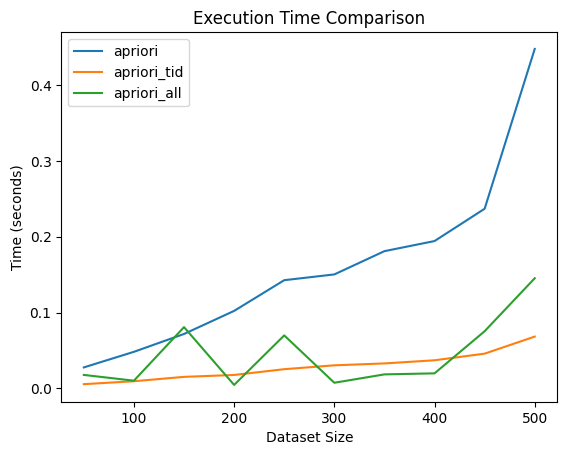

In [ ]:
import timeit
import matplotlib.pyplot as plt
from collections import defaultdict

ITEMS = ["apple", "banana", "orange", "pear", "grapefruit", "pineapple", "strawberry", "papaya", "watermelon", "grape"]

# generate dataset
DATASET = generate_dataset(ITEMS, 1000)

# set minimum support and minimum confidence
MIN_SUPPORT = 2
MIN_CONFIDENCE = 70

# set up variables to store execution times
apriori_times = []
apriori_tid_times = []
apriori_all_times = []

# perform measurements for a range of dataset sizes
for size in range(50, 550, 50):
    # generate dataset
    DATASET = generate_dataset(ITEMS, size)

    # measure execution time for apriori
    apriori_time = timeit.timeit(lambda: apriori(DATASET, MIN_SUPPORT, MIN_CONFIDENCE), number=1)

    # measure execution time for apriori_tid
    apriori_tid_time = timeit.timeit(lambda: apriori_tid(DATASET, MIN_SUPPORT, MIN_CONFIDENCE), number=1)

    # measure execution time for apriori_all
    apriori_all_time = timeit.timeit(lambda: apriori_all(DATASET, MIN_SUPPORT, MIN_CONFIDENCE), number=1)


    # add execution times and difference to lists
    apriori_times.append(apriori_time)
    apriori_tid_times.append(apriori_tid_time)
    apriori_all_times.append(apriori_all_time)

# plot the results
plt.plot(range(50, 550, 50), apriori_times, label='apriori')
plt.plot(range(50, 550, 50), apriori_tid_times, label='apriori_tid')
plt.plot(range(50, 550, 50), apriori_all_times, label='apriori_all')

plt.title('Execution Time Comparison')
plt.xlabel('Dataset Size')
plt.ylabel('Time (seconds)')
plt.legend()
plt.show()


